Load Dataset

In [7]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading in dataset
file_path = 'C:/Users/prian/OneDrive/Desktop/Classes/FDS/HW1/listings_new_york_2024.csv'
df = pd.read_csv(file_path)

#show first few rows of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,NaN,30,49,2022-06-21,0.28,3,300,0,NaN
1,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,215.0,30,4,2023-08-20,0.03,1,71,1,NaN
2,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81.0,30,193,2024-05-18,1.05,1,193,3,NaN
3,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,2022-06-05,0.04,2,365,0,NaN
4,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,65.0,30,247,2024-03-06,1.38,1,212,2,NaN


Preliminary Data Exploration

In [10]:
#check shape
df.shape

#display data types
df.dtypes

#convert any necessary columns
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

#summary statistics for columns
df.describe()

#find out categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

#count unique values and calculate first and second mode
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"First Mode: {df[col].mode()[0]} (Frequency: {df[col].value_counts().iloc[0]})")
    if len(df[col].mode()) > 1:
        print(f"Second Mode: {df[col].mode()[1]} (Frequency: {df[col].value_counts().iloc[1]})")
    print()



Column: name
Unique values: 36050
First Mode: Water View King Bed Hotel Room (Frequency: 30)

Column: host_name
Unique values: 8534
First Mode: Blueground (Frequency: 842)

Column: neighbourhood_group
Unique values: 5
First Mode: Manhattan (Frequency: 16715)

Column: neighbourhood
Unique values: 225
First Mode: Bedford-Stuyvesant (Frequency: 2709)

Column: room_type
Unique values: 4
First Mode: Entire home/apt (Frequency: 20023)

Column: license
Unique values: 1732
First Mode: Exempt (Frequency: 2872)



Data Quality Report

In [12]:
#calculate % of missing value
missing_data = df.isnull().mean() * 100
missing_data[missing_data > 0].sort_values(ascending=False)

#identify outliers with IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

#define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#find outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers[['price']]

,price
24,500.0
52,900.0
58,750.0
65,500.0
140,800.0
...,...
37730,600.0
37739,1200.0
37751,3000.0
37759,788.0


Handeling Incorrect Data

In [16]:
#dropping columns with alot of missing data
threshold = 0.5  #you can adjust the threshold as needed
df_cleaned = df.dropna(thresh=df.shape[0] * threshold, axis=1)

#impute missing numerical data with medians
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].median())

#impute missing categorical data with mode
categorical_columns = df_cleaned.select_dtypes(include=[object]).columns
for col in categorical_columns:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

#display first few rows
df_cleaned.head()


C:\Users\prian\AppData\Local\Temp\ipykernel_37288\3465185002.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].median())
C:\Users\prian\AppData\Local\Temp\ipykernel_37288\3465185002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150.0,30,49,2022-06-21,0.28,3,300,0
1,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,215.0,30,4,2023-08-20,0.03,1,71,1
2,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81.0,30,193,2024-05-18,1.05,1,193,3
3,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,2022-06-05,0.04,2,365,0
4,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,65.0,30,247,2024-03-06,1.38,1,212,2


Data Exploration

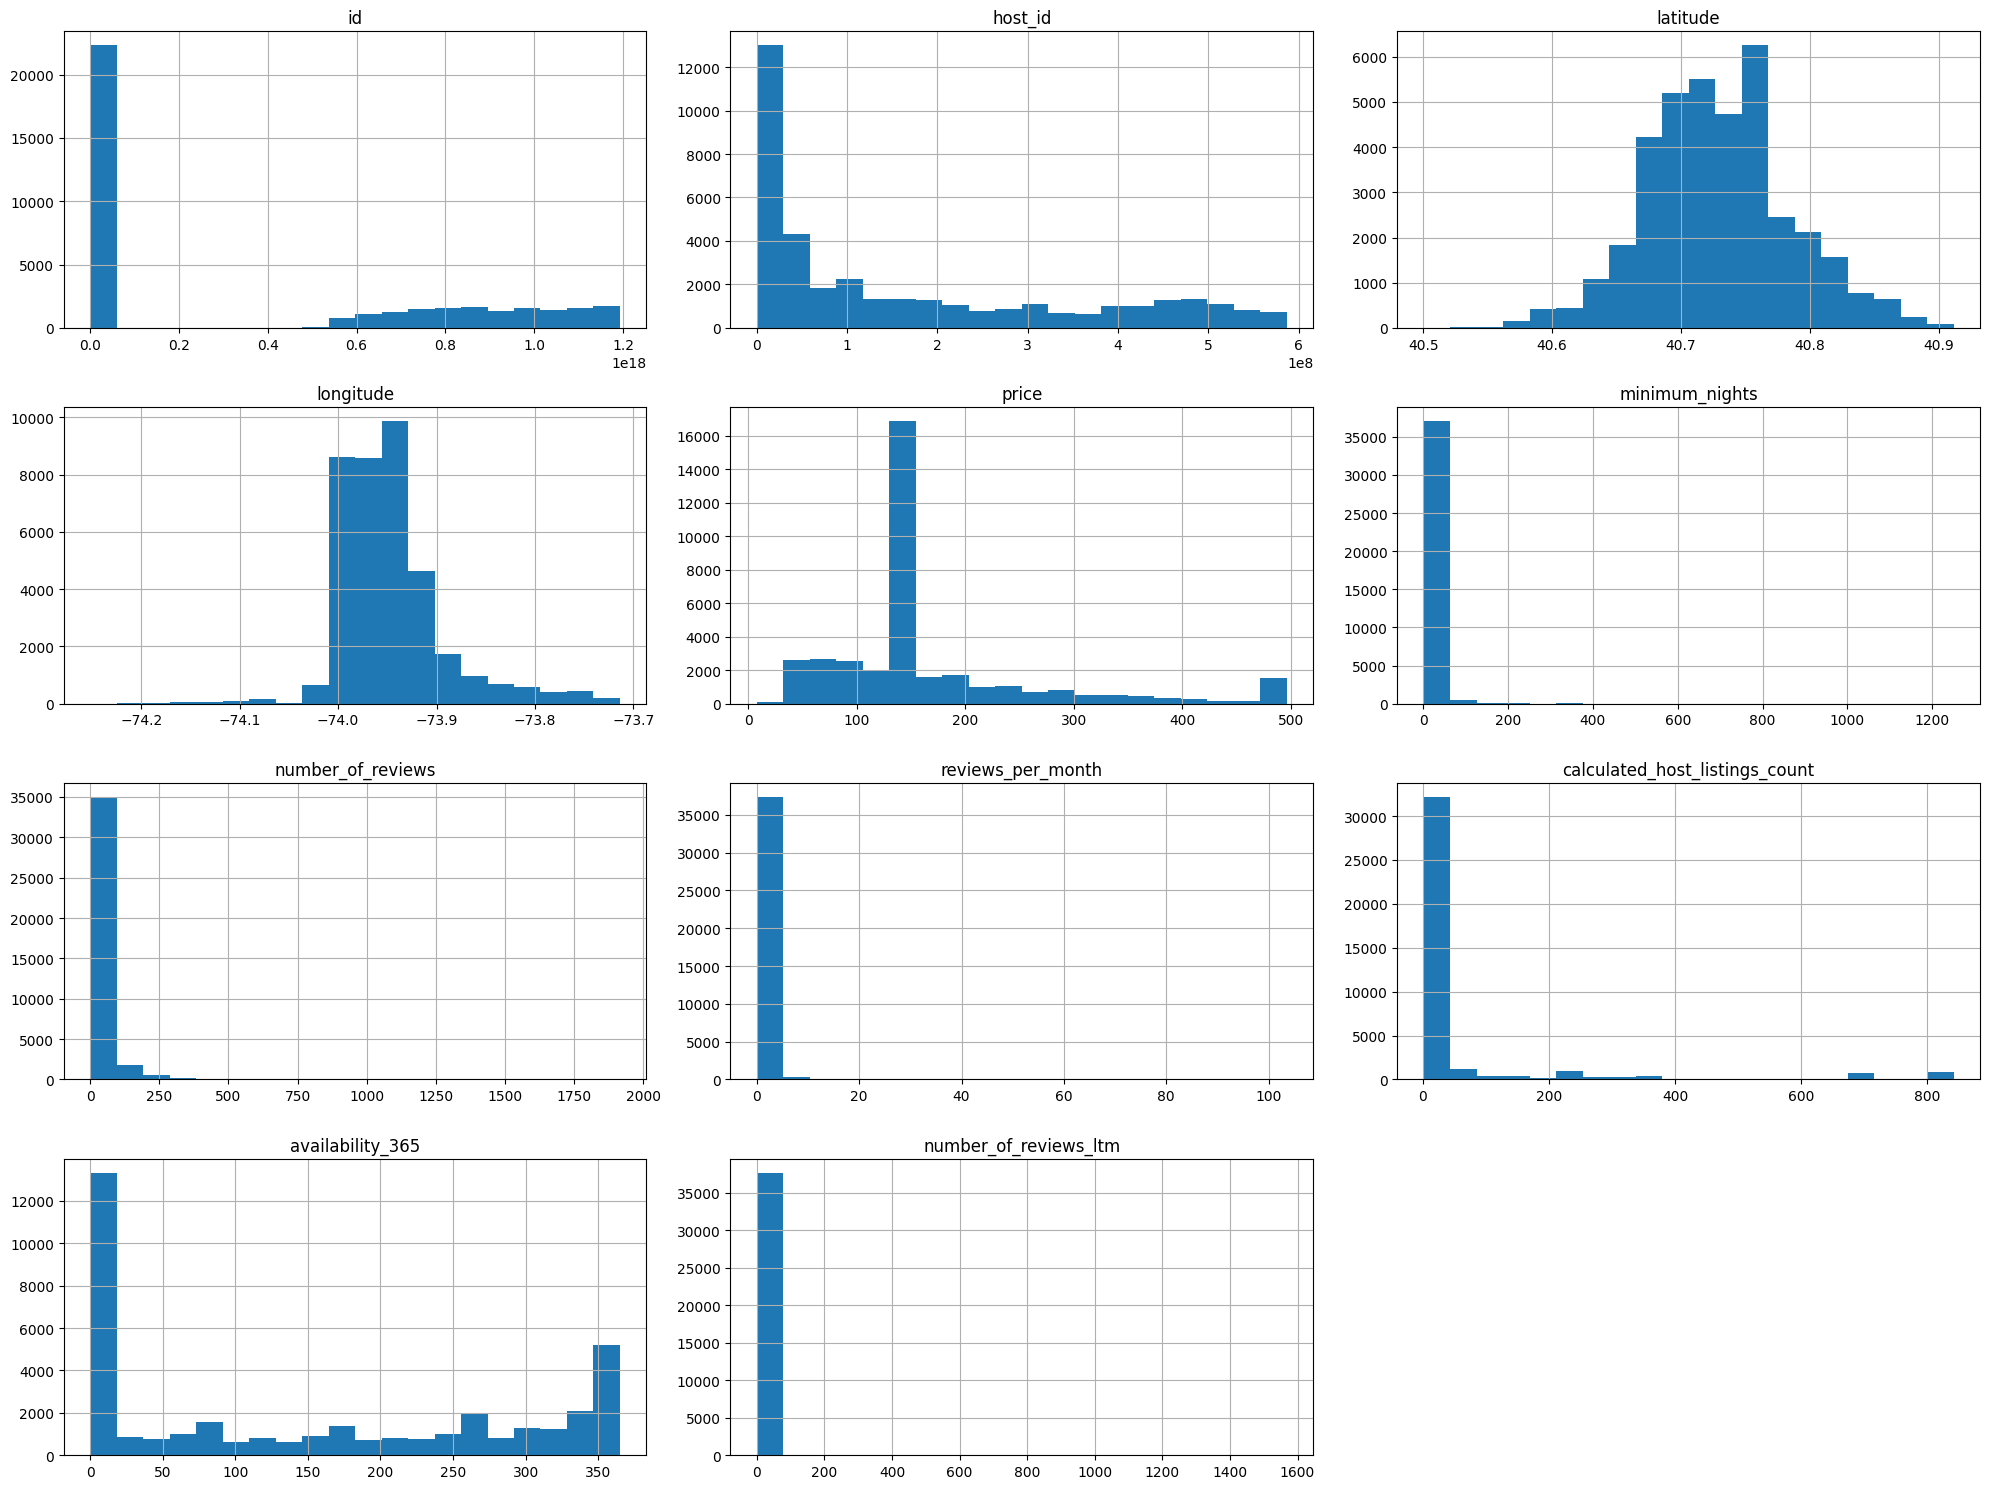

KeyboardInterrupt: 

In [22]:
# Ensure categorical columns are identified correctly
categorical_columns = df_cleaned.select_dtypes(include=[object]).columns

# Plot histograms for numerical columns
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numerical_columns].hist(bins=20, figsize=(20, 15))
plt.tight_layout()  # Adjust layout to fit all plots
plt.show()

# Plot bar plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    df_cleaned[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

# Create scatter plot for numerical columns
if 'price' in df_cleaned.columns and 'minimum_nights' in df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_cleaned, x='price', y='minimum_nights')
    plt.title('Price vs Minimum Nights')
    plt.xlabel('Price')
    plt.ylabel('Minimum Nights')
    plt.tight_layout()  # Adjust layout to fit the plot
    plt.show()
else:
    print("Columns 'price' and/or 'minimum_nights' not found in the DataFrame.")

# Calculate and visualize correlation matrix
corr_matrix = df_cleaned[numerical_columns].corr()  # Ensure only numeric columns are used

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()  # Adjust layout to fit the plot
plt.show()

Final Summary

In [18]:
#final summary of the cleaned dataset
df_cleaned.info()

#display final number of rows and columns
df_cleaned.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              37765 non-null  int64         
 1   name                            37765 non-null  object        
 2   host_id                         37765 non-null  int64         
 3   host_name                       37765 non-null  object        
 4   neighbourhood_group             37765 non-null  object        
 5   neighbourhood                   37765 non-null  object        
 6   latitude                        37765 non-null  float64       
 7   longitude                       37765 non-null  float64       
 8   room_type                       37765 non-null  object        
 9   price                           37765 non-null  float64       
 10  minimum_nights                  37765 non-null  int64         
 11  nu

(37765, 17)

Answer Questions

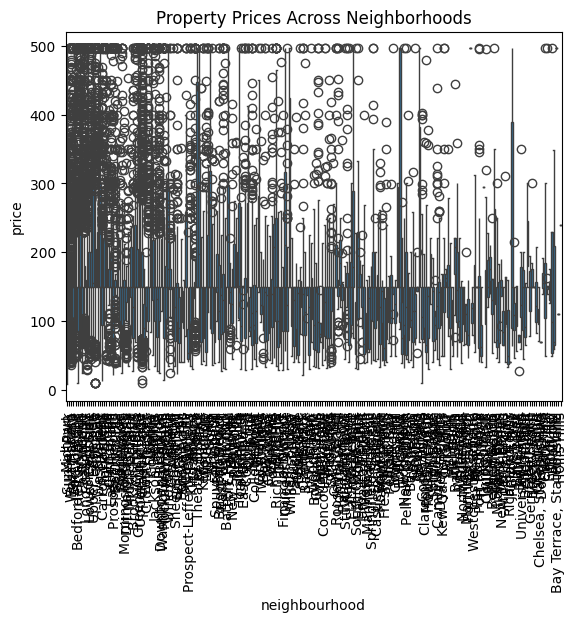

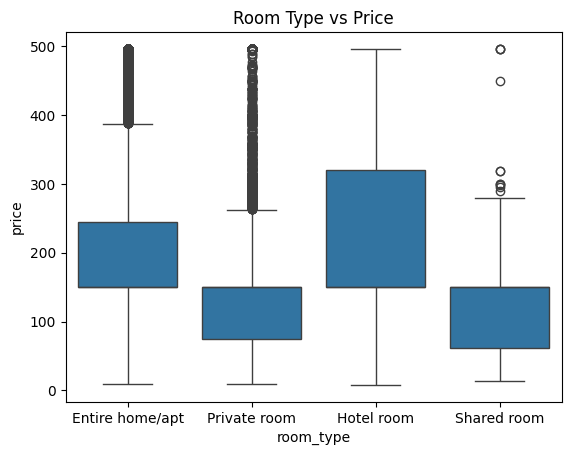

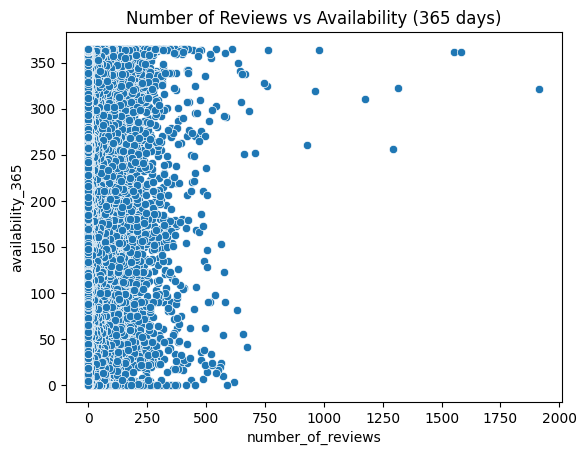

Number of Price Outliers: 0
Number of Minimum Nights Outliers: 1083


price                167.459163
number_of_reviews     26.872299
availability_365      99.929926
dtype: float64

In [21]:
#boxplot to show distribution of property prices across different neighborhoods
sns.boxplot(data=df_cleaned, x='neighbourhood', y='price')
plt.xticks(rotation=90)
plt.title('Property Prices Across Neighborhoods')
plt.show()

#boxplot to compare price across room types
sns.boxplot(data=df_cleaned, x='room_type', y='price')
plt.title('Room Type vs Price')
plt.show()

#scatter plot to see correlation between reviews and availability
sns.scatterplot(data=df_cleaned, x='number_of_reviews', y='availability_365')
plt.title('Number of Reviews vs Availability (365 days)')
plt.show()

#calculate correlation
df_cleaned[['number_of_reviews', 'availability_365']].corr()

#identify outliers in price and minimum_nights
price_outliers = df_cleaned[(df_cleaned['price'] > upper_bound)]
min_nights_outliers = df_cleaned[df_cleaned['minimum_nights'] > df_cleaned['minimum_nights'].quantile(0.95)]

print(f'Number of Price Outliers: {len(price_outliers)}')
print(f'Number of Minimum Nights Outliers: {len(min_nights_outliers)}')

#group by host_id to compare multiple listings vs single listings
host_listing_counts = df_cleaned.groupby('host_id').size()
multiple_listings = df_cleaned[df_cleaned['host_id'].isin(host_listing_counts[host_listing_counts > 1].index)]
single_listing = df_cleaned[df_cleaned['host_id'].isin(host_listing_counts[host_listing_counts == 1].index)]

#compare reviews, pricing, and availability
multiple_listings[['price', 'number_of_reviews', 'availability_365']].mean()
single_listing[['price', 'number_of_reviews', 'availability_365']].mean()
